# Lab Three - Jupiter Images with Jupyter

## *Looking at Spacecraft Image Data from the Current Juno Mission*

In this lab we learn part 3 basics of multi-dimensional plotting.  

You will learn how to: 

- Plot multi-dimensional data. 
- Read in non CSV into a data format for analysis.
- Manipulate PNG data.
- Use functions. 
- Use and develop simple functions.
- Index and use with non-Pandas data structures (dictionaries, numpy ndarrays).

By the end of this lab you should be able to: read in complicated data from non CSV formats.

Additional materials for reading: Plotting example - https://matplotlib.org/users/image_tutorial.html


## *Review of Lab 2 & Lab 1 Assignment*


### Part A: Discussion on Lab1 Assignment

Some notes on the homework - you just turned in. Great work! We saw some great Boolean indexes and creative plotting colors, fantastic analyses paragraphs. 

Some improvements to keep in mind:

- Your notebooks should be formal, and original with comments in all the commands you are running (including plotting).
- Use descriptive variable names (not variable1).
- Import statements should be at the beginning of the notebooks. 
- Clear the kernel and rerun before submitting to make sure your notebook runs as expected. 
- Reminder - there is a 10% reduction policy until the first week or whenever the labs are returned, after which it is a 0%. If it's a few more hours to get a complete lab, the 10% reduction is usually worth more points overall. 

Notes on Lab 3 and onwards. 
- The first few labs we were restrictive on what packages you could use. For Lab 3 and beyond, you can use any package we have used in class and the methods/attributes within that as long as you comment this well. For example things within Numpy, Pandas, plotting etc. If you want to use a package we have not yet seen in class please ask.



----





### Part B: Discussion on Lab 1 Science Product

A lot of you noticed that the ocean temperatures were rising slower than land temperatures:

- This is not primarily due to location of emission sources, especially when you are calculating global averages like this - instead the main rational is the heat capacity of oceans vs land masses. This means that temperature changes occur slower in oceans than they would on land. For example - water has a heat capacity of 4.18 J/gC, while sand (quartz) ~ 0.83 J/gC and soil has ~ 0.8 J/gC. This also means though it takes longer to cool down. 

- This can be a good thing, oceans help regulate temperatures, but it can also mean effects are not immediately seen and that there are time lags. 

- 2017 was the second warmest year on record since 1880, second only to 2016 with the last five warmest years on record taking place since 2010. 2018 averages are still being calculated but it's looking to be the 4th warmest.

- Keep in mind - as with any global temperature rating, specific locations can experience a wide variety compared to the average. Look at here for some examples of global maps and discussion of current climate temperature trends. 
    - https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature
    - https://www.ncei.noaa.gov/news/global-climate-201712
    - https://www.nasa.gov/press-release/long-term-warming-trend-continued-in-2017-nasa-noaa
  
<img src="globalAverages_Diff.png" alt="Drawing" style="width: 700px;"/>

----


### Part C: Are there any questions about the upcoming homework or about Lab 2? 

Last time we learned how to deal with datetime objects, datetime indexes, and multi-plot
figures.


----

## *Part 1 - Dealing with Reading In Lots of Files*

We will base this part of the lab off of data from recent mission to Jupiter called Juno. In the last few labs we've primarily dealt with climate data taken from a non-moving viewpoint. When dealing with satellite data & planetary data, it matters when and where the data was taken. We will be looking at image data (png) as well as magnetic field from Juno in this lab. 

Juno is a NASA mission to Jupiter, launched in 2011, that arrived at Jupiter on July 4th, 2016.

https://www.nasa.gov/mission_pages/juno/main/index.html

https://www.youtube.com/watch?v=SgEsf4QcR0Q&feature=youtu.be&list=PLTiv_XWHnOZpM1iLQr95P4KDXYiYnJUOE

We will evaluate the JunoCam (instrument onboard Juno) data in this lab. In your own homework you will be manipulating images from JunoCam - and if you are interested you can submit your finalized photo to the NASA team. 

The current set of featured images can be found here https://www.missionjuno.swri.edu/junocam/processing?featured=1. 


In [1]:
#let's start by importing the packages we will need for this lab

#importing packages
import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import matplotlib.pyplot as plt  #for plotting of datasets
import datetime as dt            #Importing the package datetime for 
                                 #datetime manipulation
import matplotlib.dates as mdt   #for manipulation of dates in matplotlib
import matplotlib.image as mpimg #NEW IN THIS LAB - for manipulation of img files
                                 #in plotting environments
import os                        #NEW IN THIS LAB - for interactive with files
    
#setting up Jupyter environment so plots will be placed in the notebook
%matplotlib inline



### In our lab we are looking at data from 2017-03-2, 08:20:12.283 or Product ID - JNCE_2017086_05C00105_V01. When we download these image files we get many in one download. They are located in your folder ImageSet893. 

### It would be nice to import all of these into Python. The command to use is mpimg.imread('filename') but we have at least 5 files. How can we import these files without writing the same command five times  with different file names?

### Discuss with a partner - do not read ahead

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'

'

''

'''

''''

'''

''

'


### Part 1 A. Implemention with For Loop

In [2]:
#The command os.listdir() will print out all the files in your current directory. 

print(os.listdir())



['Lab3_JupiterFlyBy.ipynb', 'globalAverages_Diff.png', 'ImageSet893', 'FinalPNGs', '.ipynb_checkpoints']


In [3]:
#to print out all the files within the ImageSet893 folder 
#we can change the auto option in os.listdir()

directoryName = './ImageSet893/' #where image files are for Juno
filenames = os.listdir(directoryName) #list all files within this directory

#below here go ahead and enter a print statement to look at what filenames look like
#ENTER PRINT STATEMENT BELOW

print(filenames)



['JNCE_2017086_05C00105_V01-blue.png', 'JNCE_2017086_05C00105_V01-raw.png', 'JNCE_2017086_05C00105_V01-red.png', 'JNCE_2017086_05C00105_V01-mapprojected.png', 'JNCE_2017086_05C00105_V01-green.png']


#### Important Note: File names, Jupyter notebooks, and Python Oh My! 

On your computer your Jupyter notebook will look in the same directory for the files. In Python filenames format this means the shorthand file name './' where '.' means "here". 

The following short hand file naming conventions will be useful for this lab and the homework. 

- ./    (one dot then slash) look within this current folder (if types in your notebook this is where the .pynb file is located)

- ../   (two dots then slash) go up one directory and look in in that location.  


If you ever try to import something and you don't know where it is you can print out the list of the files. Like we did in the cell above.


In [4]:
#let's see if we can write a for loop to iterrate over the filenames

for f in filenames:
    print(directoryName + f)
    
#look right to people? What if we want different names? There are several ways we can do
#that, one useful way is to define a function that takes in a filename, and then returns
#the object output by mpimg.imread

./ImageSet893/JNCE_2017086_05C00105_V01-blue.png
./ImageSet893/JNCE_2017086_05C00105_V01-raw.png
./ImageSet893/JNCE_2017086_05C00105_V01-red.png
./ImageSet893/JNCE_2017086_05C00105_V01-mapprojected.png
./ImageSet893/JNCE_2017086_05C00105_V01-green.png


### Part 1 B. Implemention Of For Loop Within a Function

Now that we know the file names, let's create some time saving code.

In [5]:
def readImgFile(fileString):
    '''
    All functions should have a description such as this - to describe what are inputs, 
    outputs, and function definitions. 
    
    This function takes in a file string and outputs a file object from the 
    from the mpimg.imread command
    
    In this you should use the '''''' style, not the # style for comments
    '''
    #read in the file into object readPNG
    readPNG = mpimg.imread(fileString)

    #returns object
    return(readPNG)

In [6]:
#let's see this in action

for f in filenames:
    readPNG = readImgFile(directoryName + f)














### Discussion Time. There is something happening here that isn't quite what we want. Discuss with your seatmates, specifically will the variable readPNG contain all the files?

'

''

'''

''''

'''

''

'


### Part 1 C. Introduction to Dictionaries


We don't know what type of object readPNG is - how can we deal with this? There is a handy 'grab bag' data storage system that you can use in Python called dictionaries. I like to this of this as a bag which contains whatever I tell it to.


In [7]:
#for example: 

#initialize
testDictionary = {}

print(testDictionary)
print(type(testDictionary))


{}
<class 'dict'>


In [8]:
#how would you initialize a value?

testDictionary['whateverYouWantName'] = 'stringValue'

print(testDictionary)

#look familiar? We've used this format before to change pandas dataframe column names...

{'whateverYouWantName': 'stringValue'}


In [9]:
#you can initialize this to whatever you want - for example

testDictionary['whateverYouWantNameTwo'] = np.arange(0, 5, 1)

#print dictionary
print(testDictionary, '\n')
#print entry of dictionary
print(testDictionary['whateverYouWantNameTwo'], '\n')

#you can get the keys or entry access values such as:

print(testDictionary.keys())

{'whateverYouWantName': 'stringValue', 'whateverYouWantNameTwo': array([0, 1, 2, 3, 4])} 

[0 1 2 3 4] 

dict_keys(['whateverYouWantName', 'whateverYouWantNameTwo'])


In [10]:
#let's use this now to intialize a dictionary with entries that mean something with the 
#file names

for f in filenames:
    print(f, '\n \t Slice:', f[26:-4])
    
    #note how we use both + and - indexing to accomplish this and use of \t character
    #to make the output look approachable
    
    #from the 26th entry (beginning of the color) to the fourth from the end
    

JNCE_2017086_05C00105_V01-blue.png 
 	 Slice: blue
JNCE_2017086_05C00105_V01-raw.png 
 	 Slice: raw
JNCE_2017086_05C00105_V01-red.png 
 	 Slice: red
JNCE_2017086_05C00105_V01-mapprojected.png 
 	 Slice: mapprojected
JNCE_2017086_05C00105_V01-green.png 
 	 Slice: green


In [11]:
#now we can (finally!) read in our data

#create grab bag placeholder dictionary for our image files
imageData = {}


#loop over filenames and calls function readImgFile to create dictionary entries
#with output of the images

for f in filenames:
    imageData['{}'.format(f[26:-4])] = readImgFile(directoryName + f)
    #creates the key                   #reads in the file


In [12]:
#now we can see in our dictionary the keys that we just set up. We look at the values below.

print(imageData.keys())

dict_keys(['blue', 'raw', 'red', 'mapprojected', 'green'])


## *Part 2 - Objects and Multi-dimension Data*

Let's check out what we just read in - we know what the images look like - now what 
did they import as? 

In [13]:
#check out the type here and values of 

print(imageData['blue'], '\n', type(imageData['blue']))



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 <class 'numpy.ndarray'>


In [14]:
#this is a numpy ndarray - 
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.html

#you can get the size/shape/max/min of an numpy ndarray as such:

print(imageData['blue'].size)

print(imageData['blue'].shape)

print(imageData['blue'].max())

print(imageData['blue'].min())

2560000
(1600, 1600)
0.7490196
0.0


In [15]:
#Are all the files the same shape?

for k in imageData.keys():
    print(k, imageData[k].shape)

blue (1600, 1600)
raw (12288, 1648)
red (1600, 1600)
mapprojected (1600, 1600, 3)
green (1600, 1600)


We just introduced a new object. Numpy ndarrays. We have already seen pandas dataframes, dictionaries, and numpy arrays. As stated in Lab 1 - python is object oriented. Which means everything is an object. What does that mean for us though? 

The most useful in the near term is to understand how to read the help pages. One way is to go to the online documentation. But another way is just to use the ? character which opens up a pop up. You can also use help(np.ndarray) which opens up in the notebook instead.

In [16]:
np.ndarray?



We will spend more time on what the different terms mean in these documents in another lesson, but for us now:

Parameters can be put inside the () notation of the object, whereas attributes can be accessed with the .attribute format. Methods are a type of function that's associated with the object. For example, in objects which are of the class type np.ndarrays:
- .size is an attribute within the np.ndarray class.
- .min() is a method within the np.ndarray class.

We will cover this more in depth later but if you are curious more information can be found [here].(https://docs.python.org/2/tutorial/classes.html)

In [17]:
#let's get help on the .min method? 

help(np.ndarray.min)

Help on method_descriptor:

min(...)
    a.min(axis=None, out=None, keepdims=False, initial=<no value>, where=True)
    
    Return the minimum along a given axis.
    
    Refer to `numpy.amin` for full documentation.
    
    See Also
    --------
    numpy.amin : equivalent function



### Discussion Time! What do you think is the difference between a numpy ndarray and a Pandas dataframe based on what we just saw?

## *Part 3 - Plotting with imshow*

We have just imported a multi dimensional dataset. There are several ways to plot these. Let's start with the most basics. Imshow() - more details can be found here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html or using the help() commands.


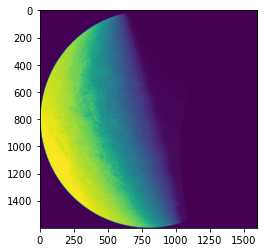

In [18]:
#simple version, we just feed it what we imported.

imgPlot  = plt.imshow(imageData['red'])

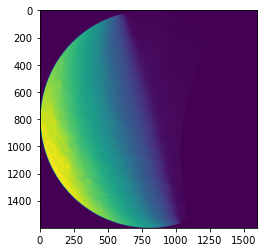

In [19]:
#while we expect, red, green, blue to plot simlilarly you can still see these are diff.
#image files

imgPlot  = plt.imshow(imageData['blue'])

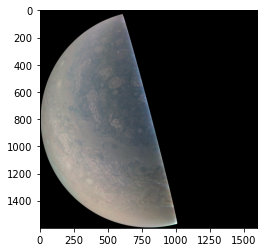

In [20]:
#what about mapprojected?

imgPlot  = plt.imshow(imageData['mapprojected'])

### Discussion time! Why is the color scale different now? What did the map-projected file contain that is different? 

### *Part 3 A. Colorscales*

We used the auto-preset. What if we want to have a different color scale? Examples of options can be found here. https://matplotlib.org/examples/color/colormaps_reference.html

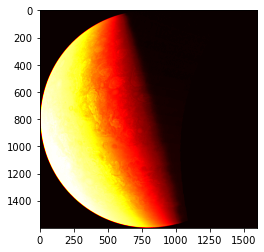

In [21]:
#plot out with different cmap, or color scale
imgPlot  = plt.imshow(imageData['red'], cmap = 'hot')

#you can set you own scale, but for now we will use the python options. 

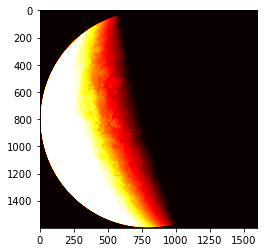

In [22]:
#to adjust the scale you can use vmin, vmax
#for example

imgPlot  = plt.imshow(imageData['red'], cmap = 'hot', vmin = 0.2, 
                      vmax = 0.8)

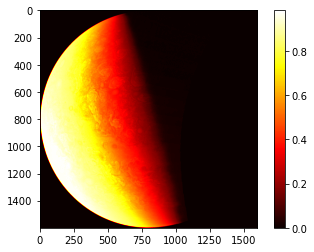

In [23]:
#it usually makes sense to set it to something similar to the min and max of the data
#like so - but adjusting slightly - also note addition of colorbar

imgPlot  = plt.imshow(imageData['red'], cmap = 'hot', vmin = imageData['red'].min(), 
                      vmax = imageData['red'].max())


cb = plt.colorbar()

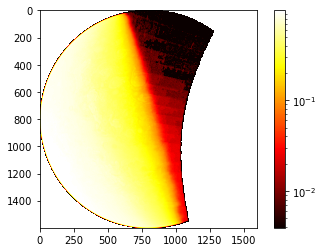

In [24]:
#see change in colorbar with norm commands? 
from   matplotlib.colors import LogNorm

imgPlot  = plt.imshow(imageData['red'], cmap = 'hot', norm = LogNorm())

cb = plt.colorbar()

### Disucssion Time: Do you think playing with the color scale would change anything in map-projected?








## *Part 4 - Plotting with Pcolormesh*¶

imshow is rather conveient for quick plotting, but sometimes you have data that has clear 
boundaries or data gaps. The main alternative for plotting data like this in matplotlib is 
pcolormesh (you might also find details about pcolor, but in general pcolormesh is faster).

In general do not use imshow except with image files. You might have data that CAN be shown as an image but for most scientific purposes it's better to use pcolormesh. 

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html

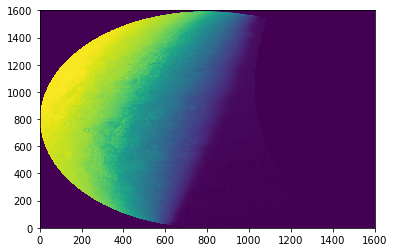

In [25]:
#the command in this case works with different inputs including: 
p = plt.pcolormesh(imageData['red'])


### Activity Time! There are differences between imshow() and pcolormesh(). The below code changes aspects of the plot to appear like the imshow plot. 

### Go ahead and change the question marks in the below code:
1. aspect ratio 
2. the colorbar - use this page to pick your own (https://matplotlib.org/examples/color/colormaps_reference.html)


### *Part 4 A. - Multi-Figure Plotting*

Let's say you wanted to plot red, green, and blue?

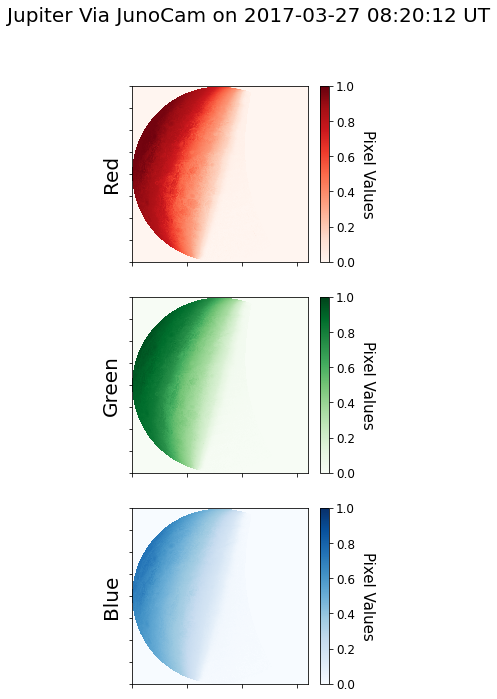

In [26]:
fig = plt.figure(figsize=(5, 11))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(3, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)
ax3.set_aspect(1.0)

#plot images data
p1 = ax1.pcolormesh(imageData['red'],   cmap = 'Reds', vmin = 0, vmax = 1)
p2 = ax2.pcolormesh(imageData['green'], cmap = 'Greens', vmin = 0, vmax = 1)
p3 = ax3.pcolormesh(imageData['blue'],  cmap = 'Blues', vmin = 0, vmax = 1)


#setting labeling
ax1.set_ylabel('Red',   fontsize = 20)
ax2.set_ylabel('Green', fontsize = 20)
ax3.set_ylabel('Blue',  fontsize = 20)


#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #unmake the tick labels
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax1.set_yticklabels([]) #unmake the tick labels
ax2.set_yticklabels([])
ax3.set_yticklabels([])


#set up the color bars to each axes
cb1 = plt.colorbar(p1, ax = ax1)
cb2 = plt.colorbar(p2, ax = ax2)
cb3 = plt.colorbar(p3, ax = ax3)


cb1.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb2.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb3.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

#make the tick parameters to be large enough to read
cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb3.ax.tick_params(labelsize=12)

### *Part 4 B. - Slicing into the Numpy NDarray -*

Remember the map projected dataset? Let's use that in our plotting - 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this 

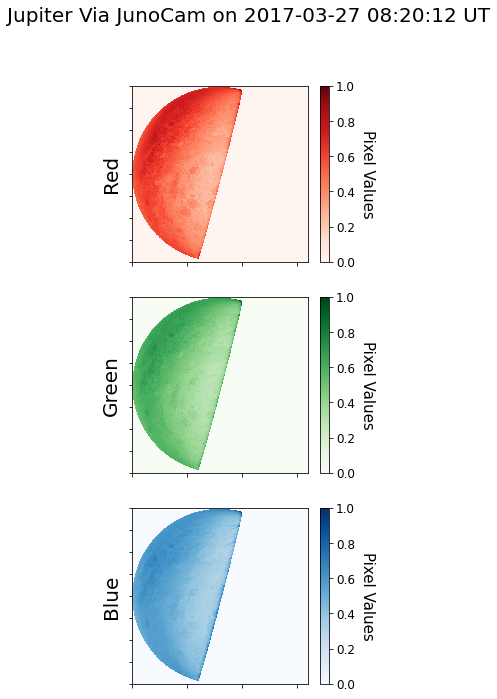

In [27]:
fig = plt.figure(figsize=(5, 11))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(3, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,:])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)
ax3.set_aspect(1.0)

#plot images data
#-------------THIS IS CHANGED
p1 = ax1.pcolormesh(imageData['mapprojected'][:, :, 0],   vmin = 0, vmax = 1,
                    cmap = 'Reds')
p2 = ax2.pcolormesh(imageData['mapprojected'][:, :, 1],   vmin =0, vmax = 1,
                    cmap = 'Greens')
p3 = ax3.pcolormesh(imageData['mapprojected'][:, :, 2],   vmin = 0, vmax = 1, 
                    cmap = 'Blues')

p1.cmap.set_under('#d3d3d3')
p2.cmap.set_under('#d3d3d3') #we've set the background to gray, by using set_under and vmin
p3.cmap.set_under('#d3d3d3')

#if we want to then remove all the bright spots then

p1.cmap.set_over('#d3d3d3')
p2.cmap.set_over('#d3d3d3') #we've set the saturation points to gray, 
p3.cmap.set_over('#d3d3d3') #by using set_over and vmin
#-----------------------------


#setting labeling
ax1.set_ylabel('Red',   fontsize = 20)
ax2.set_ylabel('Green', fontsize = 20)
ax3.set_ylabel('Blue',  fontsize = 20)


#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax1.set_yticklabels([]) #make the tick labels
ax2.set_yticklabels([])
ax3.set_yticklabels([])

#set up the color bars to each axes
cb1 = plt.colorbar(p1, ax = ax1)
cb2 = plt.colorbar(p2, ax = ax2)
cb3 = plt.colorbar(p3, ax = ax3)


cb1.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb2.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb3.set_label('Pixel Values', labelpad=20,
                     rotation=270, fontsize=15)

cb1.ax.tick_params(labelsize=12)
cb2.ax.tick_params(labelsize=12)
cb3.ax.tick_params(labelsize=12)


### See how the differences between the map-projected and non map projected change the plots? What do you think is going on here?

## *Part 5 - Augmenting Values in ndarray*

In the previous plot we accessed into the index using the three dimensional indexing [X, Y, Z] where Z designates the R, G, and B planels. What if we want to change the red values? Or highlight the green ones? In the below cell we print out the blue panel.

In [28]:
#below print out the blue panel from the mapprojected data set


imageData['mapprojected'][:, :, 2]



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### These values range from 0 to 1 with the first panel as red, second as green, third as blue. Let's increase the green and blue panels color ranges. 

In [29]:
#make a copy so we don't overrun our old dataset - setting equal will overrun our previous set
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.copy.html

imageData['mapprojectedAugment'] = imageData['mapprojected'].copy()


#change the green panel to increase by 10%

imageData['mapprojectedAugment'][:, :, 1]  = imageData['mapprojectedAugment'][:, :, 1]*1.1

#alternatively you could also use the *= syntax
#A = A*B is the same as A *= B


#change the blue panel to increase by 40%
imageData['mapprojectedAugment'][:, :, 2] *= 1.4



### What we did just overshoots the 1.0 values. Let's reset these values back to one or apply a ceiling. 

In [30]:
#This 'clips' numpy arrays and ndarrays between min and max, in this case, 0 and 1
imageData['mapprojectedAugment'][:, :, 1] = np.clip(imageData['mapprojectedAugment'][:, :, 1], 
                                                    0, 1)
imageData['mapprojectedAugment'][:, :, 2] = np.clip(imageData['mapprojectedAugment'][:, :, 2], 
      0, 1)


[Text(0, -200.0, ''),
 Text(0, 0.0, ''),
 Text(0, 200.0, ''),
 Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, ''),
 Text(0, 1400.0, ''),
 Text(0, 1600.0, '')]

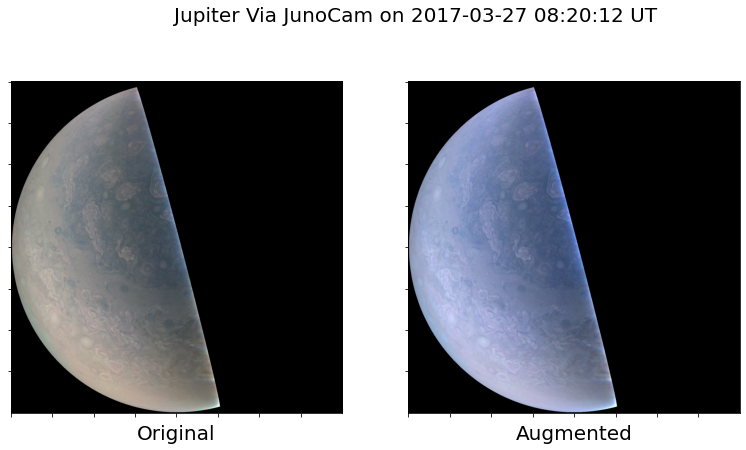

In [31]:
#and finally let's plot this.

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])
ax2.imshow(imageData['mapprojectedAugment'])


#setting labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Augmented', fontsize = 20)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #unmake the tick labels
ax2.set_xticklabels([])


ax1.set_yticklabels([]) #unmake the tick labels
ax2.set_yticklabels([])


## *Part 5 B. - More Complicated Color Adjustments - *

Let's say we want to change values that have a more complicated prior condition? 

When setting more complicated boolean conditions you can use the and (&), and the (|) or conditions. 

The syntax for this indexing in dataframes is as follows:

((condition1) boolean operator (condition2))

Wherein the operators can be:

- & 'and', | 'or'
- <= 'less than or equal', >= 'greater than or equal'
- != 'and not equal to'



In [32]:
#let's reset our copy

imageData['mapprojectedAugment'] = imageData['mapprojected'].copy()


#and now let's have an index here 
brightInd = ((imageData['mapprojectedAugment'][:, :, 0]   < 0.5) & 
             (imageData['mapprojectedAugment'][:, :, 1]   < 0.5) &
             (imageData['mapprojectedAugment'][:, :, 2]   > 0.3))

#let's multiply these values by 50%
imageData['mapprojectedAugment'][brightInd] *= 1.5

#and clip the values
imageData['mapprojectedAugment'] = np.clip(imageData['mapprojectedAugment'], 0, 1)


### Plot Comparing the Pre-Augmented and Post-Augmented Datasets

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greens"))
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this 

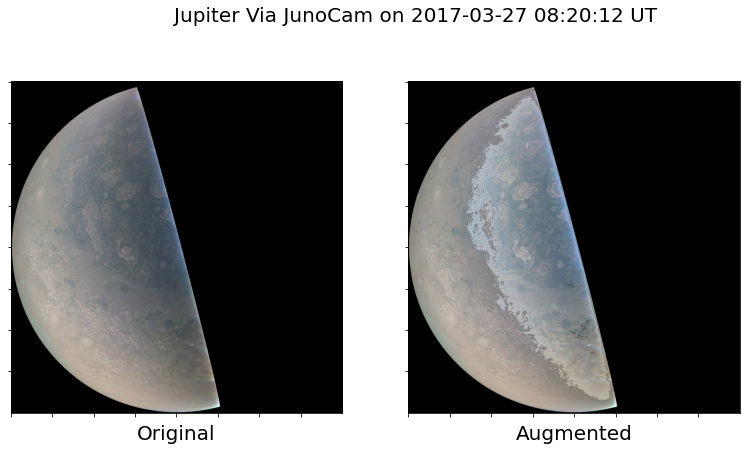

In [33]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Jupiter Via JunoCam on 2017-03-27 08:20:12 UT', fontsize=20)

gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

#make aspect ratio better - 1.0 is square. Feel free to play around with these
#and see how it streches.
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

#if we want to then remove all the bright spots then

p1.cmap.set_over('#d3d3d3')
p2.cmap.set_over('#d3d3d3') #we've set the saturday to gray, by using set_over and vmin
p3.cmap.set_over('#d3d3d3')
#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])
ax2.imshow(imageData['mapprojectedAugment'])


#setting labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Augmented', fontsize = 20)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax2.set_xticklabels([])


ax1.set_yticklabels([]) #make the tick labels
ax2.set_yticklabels([])

#how to save data into png
mpimg.imsave('./FinalPNGs/augmentedProject.png', imageData['mapprojectedAugment'])

### Your turn!!! The below code uses a preset I choose to change the colors. Try a different boolean index here and see what your plot appears to be!

# SUMMARY

From this lab you have learned the basics of several data structures including dictionaries and numpy ndarrays.We then saw imshow, pcolormesh, and basics of colorbars in action.

We have also learned about more about accessing a numpy ndarray through indexing. 

Homework: 
- Please complete homework 3 located in the file folder - due in 1.5 weeks on Friday the 8th. 
- Reminder - office hours for this will be held on Thursdays and the second lab report is due THIS Friday the 1st. 

This homework should take no more than 4-6 hours but you should start early in case you have any questions or run into issues! This lab has you develop original code.
